In [53]:
import csv
import cv2
import PIL,images
import matplotlib.pyplot as plt
import os


In [54]:
image_name=r"C://Users//uniqu//VisDrone2019-DET-train//images//0000002_00005_d_0000014.jpg"
img= cv2.imread(image_name)
##測試圖片開啟位置
#該資料集下載地方 VisDrone2019-DET dataset，trainset (1.44 GB)
#https://github.com/VisDrone/VisDrone-Dataset

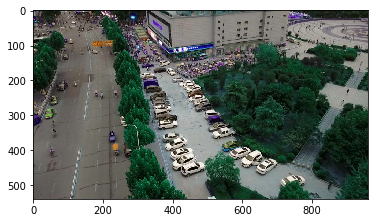

In [55]:
plt.imshow(img)

In [56]:
array_of_img = []
array_of_filename=[]

In [57]:
def read_directory(directory_name):##定義一個函數載入資料夾(directory_name)內的所有圖片
    global array_of_img
    for filename in os.listdir(r"./"+directory_name):  #讀取資料夾(要跟程式碼放在同一個路徑下)裡面的所有圖片
        img= cv2.imread(directory_name + "/" + filename) #讀入圖片
        with open(r"C://Users//uniqu//VisDrone2019-DET-train//annotations//"+filename[:-4]+".txt","r") as csvfile: 
        #每讀入一張圖片，就開啟annotations裡面的txt檔，檔名要跟圖片檔名一樣，然後在讀入時把那個txt檔叫做csvfile。
        #filename[:-4]是因為檔名讀入時是xxx.jpg，要把.jpg拿掉所以是-4，再加上.txt
            data= csvfile.readlines() #一行一行讀入txt檔
            for line in data :
                a = line.split(",")  #split()通過指定分隔符號(，)對字串進行切片
                x , y, w, h, label = int(a[0]), int(a[1]), int(a[2]), int(a[3]), a[5]  #只選取定點位置(x,y)，長寬(w,h)，跟類別12類
                if not os.path.exists(label):  #如果在程式碼所在的路徑下沒有label(0,1,2,...,10)資料夾，就建立一個
                    os.mkdir(label)
#                 print(x,w,y,h)
                crop = img[y:y+h, x:x+w, :]  #將圖片裁減出(y:y+h, x:x+w)的大小
#                 print(crop, img.shape)
                name = os.path.join(label, filename)  #將多個路徑组合後返回
#                 print(name, crop)
#                 cv2.imwrite(name, crop) ## 將裁減過的圖片存回去cv2.imwrite(os.path.join(label, filename)路徑+檔名, crop)
                cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)  #繪製方框，(0, 255, 0)指的是RGB裡面的綠色
                #cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
                cv2.putText(img, label, (x+5, y+5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 1, cv2.LINE_AA)#加上文字
                #cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)
        plt.imshow(img)
        plt.show()
                # array_of_img.append(img) #將存取下來或修改過的圖片存入array_of_img裡面
        array_of_filename.append(filename)
        break #因為有break所以只存取了一張圖片

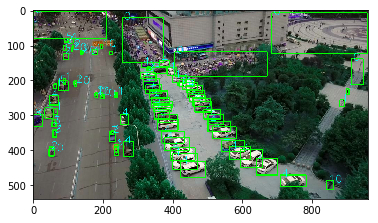

In [58]:
read_directory("images") #read_directory("資料夾名稱")，注意程式碼檔案要跟該資料夾在同一個地方

In [59]:
plt.imshow(array_of_img[5000])

IndexError: list index out of range